In [2]:
main_dir="/oak/stanford/groups/akundaje/projects/chrombpnet_paper_new/modisco_jun_30/modisco/"

atac = main_dir+"ATAC/K562/footprints/K562_k562_only_footprints.h5"
atac_full = main_dir+"ATAC/K562/footprints/K562_k562_only_uncorrected_footprints.h5"
dnase = main_dir+"DNASE/K562/footprints/K562_k562_only_footprints.h5"
dnase_full = main_dir+"DNASE/K562/footprints/K562_k562_only_uncorrected_footprints.h5"


In [3]:
import deepdish
import numpy as np
from matplotlib import pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes, inset_axes 
from mpl_toolkits.axes_grid1.inset_locator import mark_inset
import matplotlib

matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42 

In [4]:
def normalize_marginal_footprints(input_f):
    for key in input_f:
        if key=="control":
            continue
        input_f[key][0] = input_f[key][0]/sum(input_f[key][0]) 
        #input_f[key][0] = (input_f[key][0]/sum(input_f[key][0])) * (np.log((input_f[key][1]+1)/(input_f["control"][1]+1)))
        #input_f[key][0] = input_f[key][0] * (np.log(input_f[key][1]/input_f["control"][1]))

    return input_f

In [11]:
corrected_ATAC = normalize_marginal_footprints(deepdish.io.load(atac))
uncorrected_ATAC = normalize_marginal_footprints(deepdish.io.load(atac_full))

corrected_DNASE = normalize_marginal_footprints(deepdish.io.load(dnase))
uncorrected_DNASE = normalize_marginal_footprints(deepdish.io.load(dnase_full))

In [12]:
import numpy as np
def make_inset(input_array, main_axes, color, ymax, ymin, yvis, start=500-50+5, end=500+50+5):
    x1 = 0
    x2 = 100

    input_array = input_array[start:end]
    input_array = input_array*10000

    # select y-range for zoomed region
    #y1 = np.floor(min(input_array))
    #y2 = np.ceil(max(input_array))
    
    y1=np.floor(ymin*10000)
    y2=np.ceil(ymax*10000)
    
    #print(max(input_array))
    

    # Make the zoom-in plot:
    #  axins = zoomed_inset_axes(axs[i-1,3], 2, loc=1) # zoom = 2
    axins = inset_axes(main_axes, loc=1, width="30%", height=0.6) # zoom = 2

    axins.plot(input_array, c=color, alpha=0.8)
    axins.set_xlim(x1, x2)
    axins.set_ylim(y1, y2)
    #axins.set_xticks([80, 120])

    axins.tick_params(axis='both', which='minor', labelsize=8)

    plt.locator_params(axis='y', nbins=2)
    axins.set_yticks([y1, y2])

    plt.xticks(visible=False)
    plt.yticks(visible=yvis)

    #(main_axes, axins, loc1=2, loc2=4, fc="none", ec="0.5", linewidth=0.1, linestyle="--")
    plt.draw()
    
    

In [15]:
corrected_ATAC.keys()

dict_keys(['K562_COUNTS_metacluster_0_pattern_0', 'K562_COUNTS_metacluster_0_pattern_1', 'K562_COUNTS_metacluster_0_pattern_10', 'K562_COUNTS_metacluster_0_pattern_11', 'K562_COUNTS_metacluster_0_pattern_12', 'K562_COUNTS_metacluster_0_pattern_13', 'K562_COUNTS_metacluster_0_pattern_14', 'K562_COUNTS_metacluster_0_pattern_15', 'K562_COUNTS_metacluster_0_pattern_16', 'K562_COUNTS_metacluster_0_pattern_17', 'K562_COUNTS_metacluster_0_pattern_18', 'K562_COUNTS_metacluster_0_pattern_19', 'K562_COUNTS_metacluster_0_pattern_2', 'K562_COUNTS_metacluster_0_pattern_20', 'K562_COUNTS_metacluster_0_pattern_21', 'K562_COUNTS_metacluster_0_pattern_22', 'K562_COUNTS_metacluster_0_pattern_23', 'K562_COUNTS_metacluster_0_pattern_24', 'K562_COUNTS_metacluster_0_pattern_25', 'K562_COUNTS_metacluster_0_pattern_26', 'K562_COUNTS_metacluster_0_pattern_27', 'K562_COUNTS_metacluster_0_pattern_28', 'K562_COUNTS_metacluster_0_pattern_29', 'K562_COUNTS_metacluster_0_pattern_3', 'K562_COUNTS_metacluster_0_patter

In [16]:
#motifs = [key for key in corrected_5M.keys() if key!="control"]
#motif_names =  [key.replace("GM12878_COUNTS_metacluster_","").replace("pattern_","") for key in corrected_5M.keys() if key!="control"]
#ylims=[]

In [17]:
def plot_tracks(uncorrected, corrected, ax=None, ylim=0.01, start=500-100+5, end=500+100+5 ):
    width = end - start
    ax.plot(range(width), uncorrected[start:end]*1000, 'r', linewidth=1, alpha=0.3, label="uncorrected")
    ax.plot(range(width), corrected[start:end]*1000, 'k', linewidth=1, label="corrected")
    #ax.set_ylim(0,ylim) 


K562_COUNTS_metacluster_0_pattern_0
K562_COUNTS_metacluster_0_pattern_1
K562_COUNTS_metacluster_0_pattern_2
K562_COUNTS_metacluster_0_pattern_3
K562_COUNTS_metacluster_0_pattern_4
K562_COUNTS_metacluster_0_pattern_5
K562_COUNTS_metacluster_0_pattern_6
K562_COUNTS_metacluster_0_pattern_7
K562_COUNTS_metacluster_0_pattern_8
K562_COUNTS_metacluster_0_pattern_10
K562_COUNTS_metacluster_0_pattern_11


/users/anusri/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:53: UserWarning: Glyph 9 (	) missing from current font.
/users/anusri/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:56: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
/users/anusri/anaconda3/lib/python3.7/site-packages/IPython/core/pylabtools.py:132: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


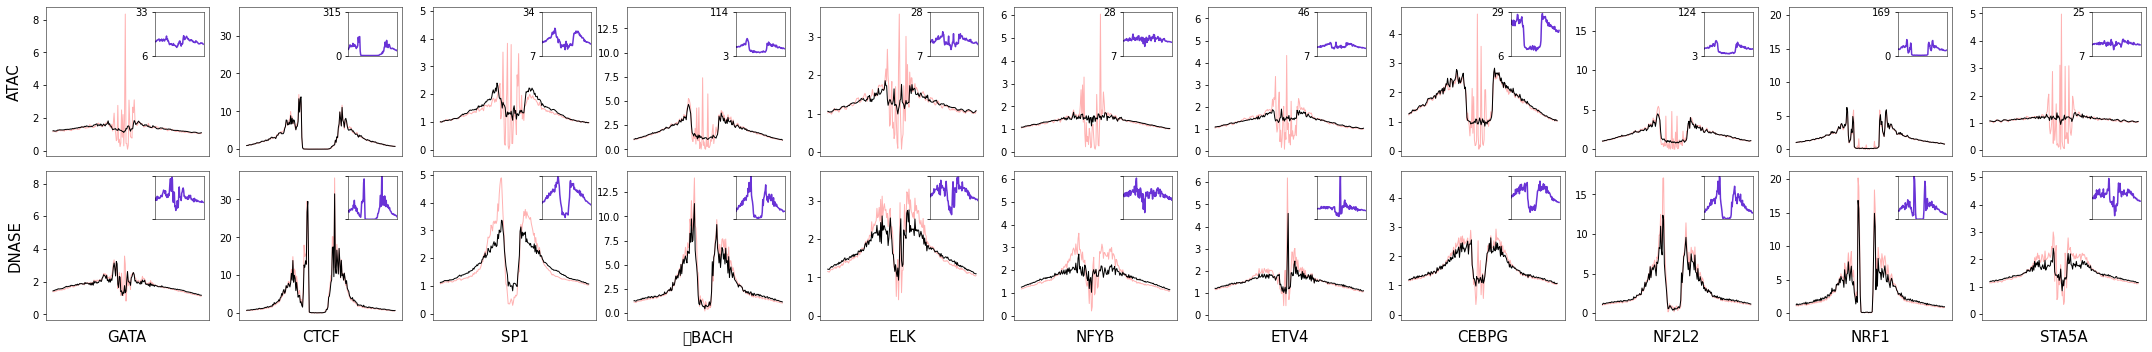

In [34]:
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes, inset_axes 
from mpl_toolkits.axes_grid1.inset_locator import mark_inset
from matplotlib import rc
import matplotlib

import matplotlib

matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42 
matplotlib.rc('axes', linewidth=0.5) 

fig,axs = plt.subplots(2,11,figsize=(30,5),sharey="col",sharex=False)

models = ["ATAC", "DNASE"]
ylims=[0.009, 0.009, 0.009, 0.009, 0.009, 0.009, 0.009]

index=[0,1,2,3,4,5,6,7,8,10,11,12]
motif_names = ["GATA", "CTCF", "SP1", "	BACH", "ELK", "NFYB", "ETV4", "CEBPG", "NF2L2", "NRF1", "STA5A", "FOSL1+JUND" ]
for i in range(1,12):
    motif_t = "K562_COUNTS_metacluster_0_pattern_"+str(index[i-1])
    print(motif_t)
    plot_tracks(uncorrected_ATAC[motif_t][0], corrected_ATAC[motif_t][0], axs[0,i-1])
    plot_tracks(uncorrected_DNASE[motif_t][0], corrected_DNASE[motif_t][0], axs[1,i-1])
 
    ymax = np.max([corrected_ATAC[motif_t][0],corrected_DNASE[motif_t][0]])
    ymin = np.min([corrected_ATAC[motif_t][0],corrected_DNASE[motif_t][0]])

    #print(ymax)
    #print(ymin)

    inset_color = "#4400cc"
    make_inset(corrected_ATAC[motif_t][0], axs[0,i-1], inset_color, ymax, ymin, yvis=True)
    make_inset(corrected_DNASE[motif_t][0], axs[1,i-1], inset_color, ymax, ymin, yvis=False)
    
#motif_names=["CTCF", "IRF1", "JDP2", "RUNX", "NFKB", "SP1", "SPIB", "NFYB", "ELK", "FOSL2+JUN"]

for ax, col in zip(axs[-1], motif_names):
    ax.set_xlabel(col, rotation=0, labelpad=10, fontsize=15)

    
for ax, row in zip(axs[:,0], models):
    ax.set_ylabel(row, rotation=90, labelpad=10, fontsize=15)    

plt.setp(plt.gcf().get_axes(), xticks=[]);

#plt.tick_params(left = True, right = False , labelleft = False ,
#                labelbottom = False, bottom = False)

#plt.yticks(visible=False)
#plt.xticks(visible=False)

#plt.savefig("marginal_footprints_on_motifs_zoomed_all_1.pdf", dpi=300)
plt.savefig("subfigs/footprints_compare/marginal_footprinting.pdf", dpi=300)


fig.tight_layout()